In [1]:
from JDFTxFreeNrg.testing import anl_sphere_volume, anl_2sphere_union_volume
from JDFTxFreeNrg.solv_entropy import get_monte_carlo_spheres_volume, get_mesh_spheres_volume
import numpy as np
import matplotlib.pyplot as plt
from time import time

# def get_monte_carlo_spheres_volume_and_uncertainty(rs, centers, npoints, nsamples=3):
#     vol = get_monte_carlo_spheres_volume(rs, centers, npoints=npoints)
#     uncertainty = vol / np.sqrt(npoints)
#     # vols = [get_monte_carlo_spheres_volume(rs, centers, npoints) for _ in range(nsamples)]
#     # vol = vols[0]
#     # uncertainty = np.std(vols)
#     return vol, uncertainty

def plot_volume_accuracy(
        vol_true: float, vol_mcs: list[float], vol_mesh: list[float], nsamples: list[float], time_mcs: list[float], 
        time_mesh: list[float], dev_mcs: list[float]):
    err_mcs = [((v - vol_true) / vol_true) for v in vol_mcs]
    err_mesh = [((v - vol_true) / vol_true) for v in vol_mesh]
    fig, ax = plt.subplots(nrows=2)
    ax[0].axhline(y=0.0, color='green')
    ax[0].plot(time_mesh, err_mesh, marker='o', label='Mesh', color="red")
    ax[0].plot(time_mcs, err_mcs, marker='o', label='Monte Carlo', color="blue")
    ax[0].set_xlabel('Time (s)')
    ax[0].set_ylabel('Relative error')
    ax[0].legend()
    ax[1].plot(time_mesh, vol_mesh, marker='o', label='Mesh', color="red")
    ax[1].scatter(time_mcs, vol_mcs, marker='o', label='Monte Carlo', color="blue")
    ax[1].errorbar(time_mcs, vol_mcs, yerr=dev_mcs, color="cyan")
    ax[1].plot(time_mcs, vol_mcs, color="blue", zorder=3)
    
    ax[1].axhline(y=vol_true, color='green', linestyle='--', label='Analytical')
    ax[1].set_xlabel('Time (s)')
    ax[1].set_ylabel('Computed volume')
    ax[1].legend()
    plt.show()

def get_mesh_volume_samples(rs: list[float], centers: list[np.ndarray], nsampless: list[int]):
    v_meshs = []
    t_meshs = []
    for ns in nsampless:
        start = time()
        v_mesh = get_mesh_spheres_volume(rs, centers, ncubes=int(ns))
        end = time()
        v_meshs.append(v_mesh)
        t_meshs.append(end - start)
    return v_meshs, t_meshs

def get_mc_volume_samples(rs: list[float], centers: list[np.ndarray], nsampless: list[int]):
    v_mcs = []
    t_mcs = []
    unc_mcs = []
    for ns in nsampless:
        start = time()
        v_mc, sem_mc = get_monte_carlo_spheres_volume(rs, centers, npoints=int(ns))
        end = time()
        v_mcs.append(v_mc)
        t_mcs.append(end - start)
        unc_mcs.append(sem_mc*v_mc)
    return v_mcs, t_mcs, unc_mcs



def test_single_sphere_volume():
    r = np.random.random() + 0.5
    v_anl = anl_sphere_volume(r)
    rs = [r]
    centers = [np.random.rand(3) * 10.0]
    nsampless = [1e3, 1e4, 1e5, 2e5, 3e5]
    # nsampless = [1e2, 2e2, 3e2, 4e2, 1e3, 3e3, 6e3, 1e4]
    # nsampless = list(np.arange(1e4, 1e5, 2e4))
    v_meshs, t_meshs = get_mesh_volume_samples(rs, centers, np.array(nsampless)*200)
    v_mcs, t_mcs, dev_mcs = get_mc_volume_samples(rs, centers, nsampless)
    plot_volume_accuracy(v_anl, v_mcs, v_meshs, nsampless, t_mcs, t_meshs, dev_mcs)


def test_double_sphere_volume():
    rs = [np.random.random() + 0.5, np.random.random() + 0.5]
    centers = [np.zeros(3), np.ones(3)*0.5+np.random.random(3)*0.1]
    v_anl = anl_2sphere_union_volume(rs[0], rs[1], np.linalg.norm(centers[0]-centers[1]))
    nsampless = [1e3, 1e4, 1e5, 2e5, 3e5]
    v_meshs = []
    v_mcs = []
    t_meshs = []
    t_mcs = []
    for ns in nsampless:
        start = time()
        v_mesh = get_mesh_spheres_volume(rs, centers, ncubes=int(ns*200))
        end = time()
        v_meshs.append(v_mesh)
        t_meshs.append(end - start)
        start = time()
        v_mc, dev_mc = get_monte_carlo_spheres_volume(rs, centers, npoints=int(ns))
        end = time()
        v_mcs.append(v_mc)
        t_mcs.append(end - start)
    plot_volume_accuracy(v_anl, v_mcs, v_meshs, nsampless, t_mcs, t_meshs)




# test_single_sphere_volume()
# test_double_sphere_volume()




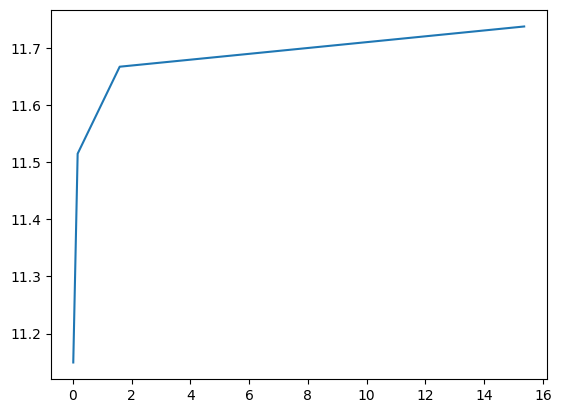

In [2]:
r = np.random.random() + 0.5
v_anl = anl_sphere_volume(r)
rs = [r]
centers = [np.random.rand(3) * 10.0]
nsampless = [1e3, 1e4, 1e5, 1e6]

v_meshs, t_meshs = get_mesh_volume_samples(rs, centers, np.array(nsampless)*200)

plt.plot(t_meshs, v_meshs)

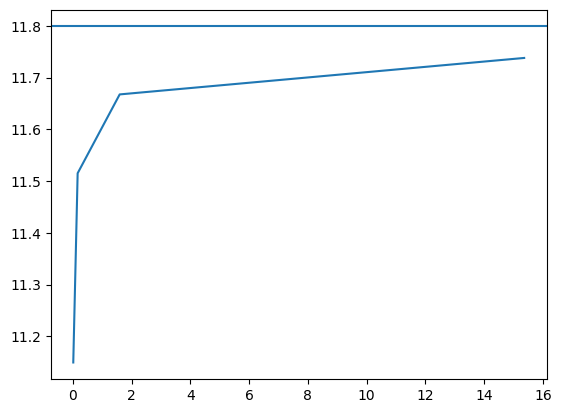

In [3]:

v_anl = anl_sphere_volume(rs[0])
plt.plot(t_meshs, v_meshs, label='Mesh')
plt.axhline(v_anl)